In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
pylab.rcParams.update(params)
black = '#000000'
yellow = '#F0F442'
orange = '#ec7f31'
#gold = '#E69F00'
gold = '#f0bd24'
green = '#009E73'
dblue = '#0072B2'
lblue = '#56B4E9'
pink = '#F6BBCA'
red = '#FF3442'
purple = '#4f0069'
lgreen = '#00ff99'
c = [purple, red, orange, gold, yellow, green, lgreen, dblue, lblue, pink]
bl = '#0000ff'
pu = '#8c1aff'
bg = '#00cc66'
cy = '#00ccff'
pi = '#ff66ff'
re = '#990033'
ora = '#ff704d'
ye = '#ffff66'
gr = '#99ff99'
pal = [bl, pu, bg, cy, pi, re, ora, ye, gr]

In [17]:
filedir = '/gpfs/amarolab/monolayers/sasa_SA19'
#import total_sasa.xvg data
total_sasa = np.genfromtxt(filedir+'/total_sasa.xvg', skip_header=24)
#import solv_energy.xvg data
solv_nrg = np.genfromtxt(filedir+'/solv_energy.xvg', skip_header=24)
#import sasa_per_residue.xvg
sasa_per_res = np.genfromtxt(filedir+'/sasa_per_residue.xvg', skip_header=25)

#appending data from total_sasa
a19 = []
b = []
a19.append(total_sasa[:,0]/1000)
print(a)
b.append(total_sasa[:,1])
print(b)

#appending data from solv_nrg
c = []
d = []
c.append(solv_nrg[:,0]/1000)
d.append(solv_nrg[:,1])
print(c)
print(d)

#appending data from sasa_per_res
e = []
f = []
err = []
e.append(sasa_per_res[:,0])
f.append(sasa_per_res[:,1])
err.append(sasa_per_res[:,2])
print(e)
print(f)
print(err)

[array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
         9.99800000e+01,   9.99900000e+01,   1.00000000e+02])]
[array([ 237.708,  236.328,  239.805, ...,  222.739,  228.038,  226.666])]
[array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
         1.18980000e+02,   1.18990000e+02,   1.19000000e+02])]
[array([-35.676, -47.296, -40.135, ..., -42.004, -38.635, -40.149])]
[array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76., 

85.6359649122807
57.123684210526314
37.687012987012984
34.12162162162162


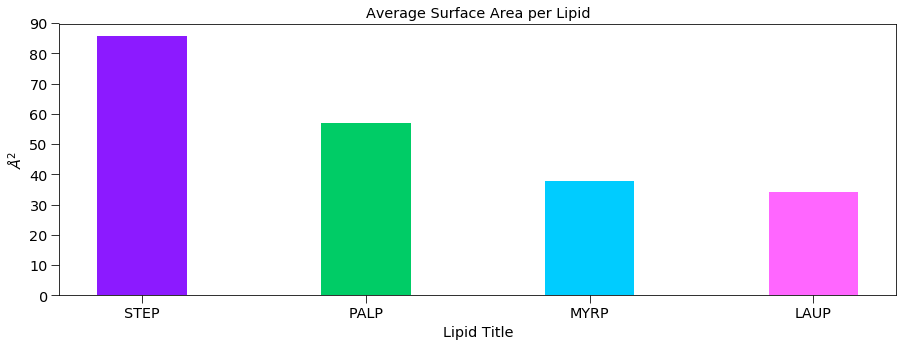

In [60]:
#plotting the average of each residue 
#STE
g = []
h = []
g.append(e[0][0:114])
#print(g)
h.append(f[0][0:114])
#print(h)
avg_STEP = np.mean(h)*100
print(avg_STEP)

#PALP
i = []
j = []
i.append(e[0][114:266])
#print(i)
j.append(f[0][114:266])
#print(j)
avg_PALP = np.mean(j)*100
print(avg_PALP)

#MYRP 
k = []
l = []
k.append(e[0][266:343])
#print(k)
l.append(f[0][266:343])
#print(l)
avg_MYRP = np.mean(l)*100
print(avg_MYRP)

#LAUP
m = []
n = []
m.append(e[0][343:380])
#print(m)
n.append(f[0][343:380])
#print(n)
avg_LAUP = np.mean(n)*100
print(avg_LAUP)

x_values = [2, 4, 6, 8]
plt.xticks([2, 4, 6, 8], ('STEP', 'PALP', 'MYRP', 'LAUP'))
plt.title('Average Surface Area per Lipid')
plt.ylabel(r'$\AA$''$^2$')
plt.xlabel('Lipid Title')

plt.bar(x_values[0], avg_STEP, color=pal[1])
plt.bar(x_values[1], avg_PALP, color=pal[2])
plt.bar(x_values[2], avg_MYRP, color=pal[3])
plt.bar(x_values[3], avg_LAUP, color=pal[4])

plt.savefig('/home/drez/Desktop/avg_surface_area_per_lipid.png', dpi=300)

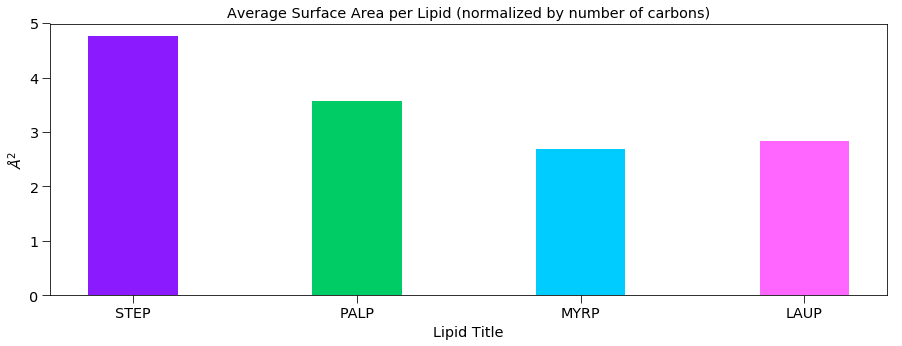

In [61]:
#Remake plot normalized by # of C
x_values = [2, 4, 6, 8]
plt.xticks([2, 4, 6, 8], ('STEP', 'PALP', 'MYRP', 'LAUP'))
plt.title('Average Surface Area per Lipid (normalized by number of carbons)')
plt.ylabel(r'$\AA$''$^2$')
plt.xlabel('Lipid Title')

norm_STEP = avg_STEP/18
norm_PALP = avg_PALP/16
norm_MYRP = avg_MYRP/14
norm_LAUP = avg_LAUP/12
plt.bar(x_values[0], norm_STEP, color=pal[1])
plt.bar(x_values[1], norm_PALP, color=pal[2])
plt.bar(x_values[2], norm_MYRP, color=pal[3])
plt.bar(x_values[3], norm_LAUP, color=pal[4])

plt.savefig('/home/drez/Desktop/norm_avg_surface_area_per_lipid.png', dpi=300)

<Container object of 3 artists>

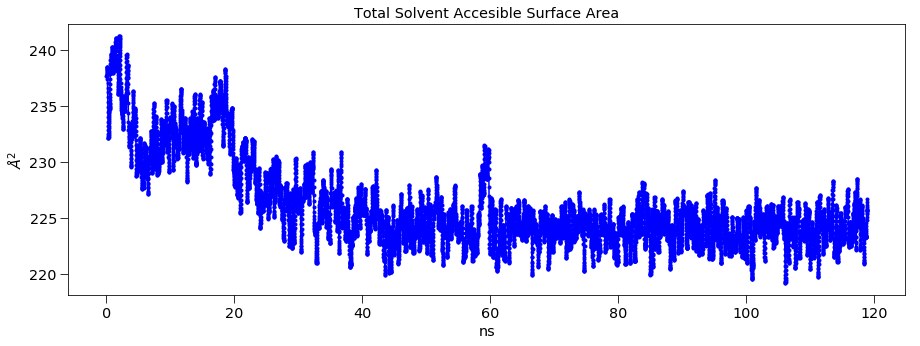

In [18]:
#total SASA
import scipy.signal as signal 

N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data19 = signal.filtfilt(B,A, b)

plt.title('Total Solvent Accesible Surface Area')
plt.ylabel(r'$\AA$''$^2$')
plt.xlabel('ns')

plt.errorbar(a19, smooth_data19, color=pal[0], marker='.')
#plt.savefig('/home/drez/Desktop/total_SASA.png', dpi=300)

In [36]:
filedir2 = '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/sasa'
#import total_sasa.xvg data
total_sasa2 = np.genfromtxt(filedir2+'/total_sasa.xvg', skip_header=24)
#import solv_energy.xvg data
solv_nrg2 = np.genfromtxt(filedir2+'/solv_energy.xvg', skip_header=24)
#import sasa_per_residue.xvg
sasa_per_res2 = np.genfromtxt(filedir2+'/sasa_per_residue.xvg', skip_header=25)

#appending data from total_sasa
a195 = []
b195 = []
a195.append(total_sasa2[:,0]/1000)
b195.append(total_sasa2[:,1])

#appending data from solv_nrg
c = []
d = []
c.append(solv_nrg2[:,0]/1000)
d.append(solv_nrg2[:,1])
print(c)
print(d)

#appending data from sasa_per_res
e = []
f = []
err = []
e.append(sasa_per_res2[:,0])
f.append(sasa_per_res2[:,1])
err.append(sasa_per_res2[:,2])
print(e)
print(f)
print(err)

[array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
         9.99800000e+01,   9.99900000e+01,   1.00000000e+02])]
[array([-34.004, -41.576, -35.517, ..., -38.89 , -42.328, -35.94 ])]
[array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
         82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
         91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,
        100.,  101.,  102.,  1

In [56]:
filedir3 = '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/sasa'
#import total_sasa.xvg data
total_sasa3 = np.genfromtxt(filedir3+'/total_sasa.xvg', skip_header=24)
a20 = []
b20 = []
a20.append(total_sasa3[:,0]/1000)
b20.append(total_sasa3[:,1])

In [67]:
filedir4= '/gpfs/amarolab/monolayers/MIX2_NaCl0.4_GMX/SA20_100ns/sasa'
total_sasa4 = np.genfromtxt(filedir4+'/total_sasa.xvg', skip_header=24)
mix2a = []
mix2b = []
mix2a.append(total_sasa4[:,0]/1000)
mix2b.append(total_sasa4[:,1])
smooth_data_mix2 = signal.filtfilt(B, A, mix2b)

In [79]:
filedir5= '/gpfs/amarolab/monolayers/LAUP_NaCl0.4_GMX/SA20_100ns/sasa'
total_sasa5 = np.genfromtxt(filedir5+'/total_sasa.xvg', skip_header=24)
laupa = []
laupb = []
laupa.append(total_sasa5[:,0]/1000)
laupb.append(total_sasa5[:,1])
smooth_data_LAUP = signal.filtfilt(B, A, laupb)

In [89]:
filedir6= '/gpfs/amarolab/monolayers/MIX3_NaCl0.4_GMX/SA20_100ns/sasa'
total_sasa6 = np.genfromtxt(filedir6+'/total_sasa.xvg', skip_header=24)
mix3a = []
mix3b = []
mix3a.append(total_sasa6[:,0]/1000)
mix3b.append(total_sasa6[:,1])
smooth_data_mix3 = signal.filtfilt(B, A, mix3b)

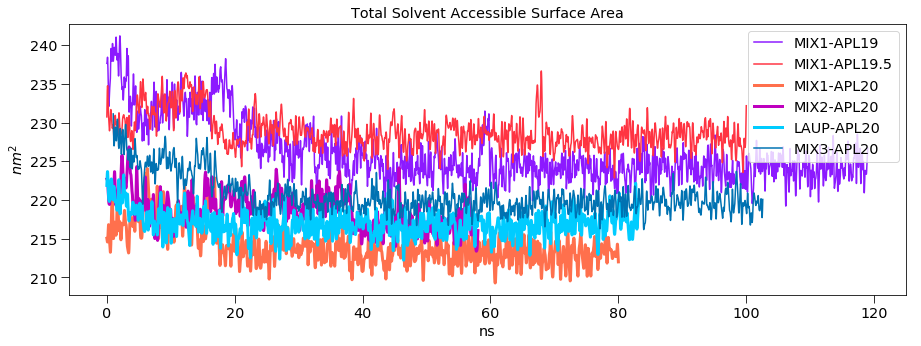

In [99]:
#total SASA
import scipy.signal as signal 

N  = 3    # Filter order
Wn = 0.07 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data20 = signal.filtfilt(B,A, b20)

plt.title('Total Solvent Accessible Surface Area')
plt.ylabel(r'$nm$''$^2$')
plt.xlabel('ns')

plt.errorbar(a19, smooth_data19, color=pu, marker='None', label='MIX1-APL19')
plt.errorbar(a195, smooth_data195, color=red, marker='None', label='MIX1-APL19.5')
plt.errorbar(a20, smooth_data20, color=ora, marker='None', label='MIX1-APL20', lw=3)
plt.errorbar(mix2a, smooth_data_mix2, color='m', marker='None', label='MIX2-APL20', lw=3)
plt.errorbar(laupa, smooth_data_LAUP, color=cy, marker='None', label='LAUP-APL20', lw=3)
plt.errorbar(mix3a, smooth_data_mix3, color=dblue, marker='None', label='MIX3-APL20')
plt.legend(loc=1)
plt.savefig('/home/adommer/Desktop/total_SASA.png', dpi=300)

In [80]:
sasa_per_res_mix1_20 = np.genfromtxt('/gpfs/amarolab/monolayers/LAUP_NaCl0.4_GMX/SA20_100ns/sasa'+'/sasa_per_residue.xvg', skip_header=25)
sasa_per_res_laup_20 = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/sasa'+'/sasa_per_residue.xvg', skip_header=25)

[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.  108.
  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.  120.
  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.  132.
  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.  144.
  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.  156.
  157.  158.  159.  160.  161.  162.  163.  164.  1

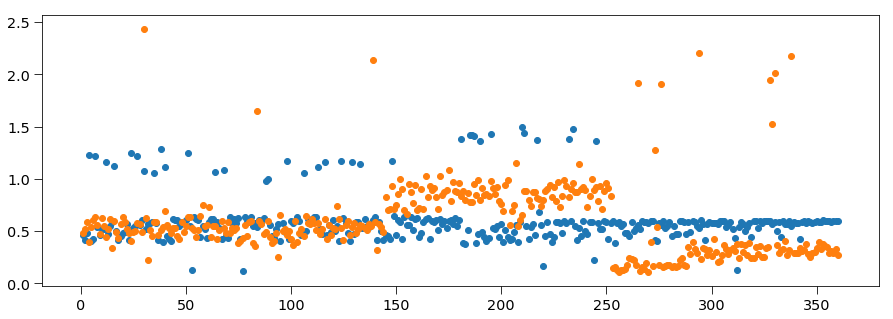

In [88]:
print(sasa_per_res_laup_20[:,0])
print(sasa_per_res_laup_20[:,1])
plt.scatter(sasa_per_res_mix1_20[:,0], sasa_per_res_mix1_20[:,1])
plt.scatter(sasa_per_res_laup_20[:,0], sasa_per_res_laup_20[:,1])